In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
# ML tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [5]:
# Load data
df = pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
"""Data Cleaning"""

In [7]:
# Check for missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [11]:
# Convert categorical "type" into dummy/one-hot
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [13]:
# Drop 'nameOrig' and 'nameDest'
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [15]:
# Create new features (optional but useful)
df['balanceChangeOrig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balanceChangeDest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [ ]:
"""Exploratory Data Analysis (EDA)"""

Text(0.5, 1.0, 'Class Distribution')

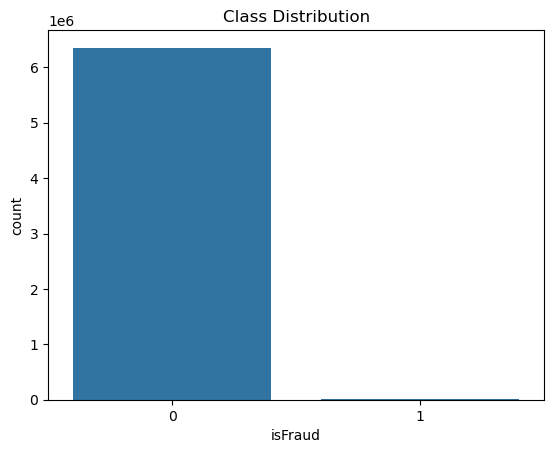

In [17]:
# Fraud distribution
sns.countplot(x='isFraud', data=df)
plt.title("Class Distribution")

Text(0.5, 1.0, 'Correlation Heatmap')

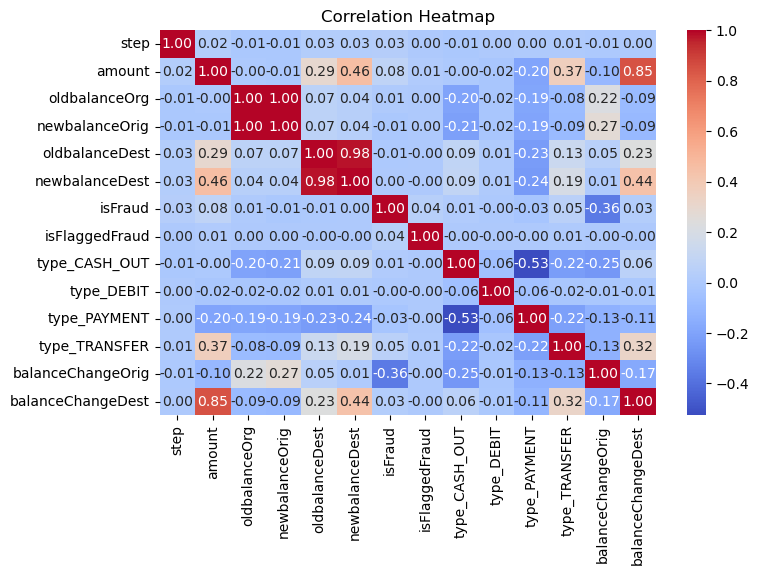

In [19]:
# Correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")

In [ ]:
"""Feature Selection"""

In [21]:
# Feature importance using Random Forest
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']

model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

Text(0.5, 1.0, 'Top 10 Feature Importances')

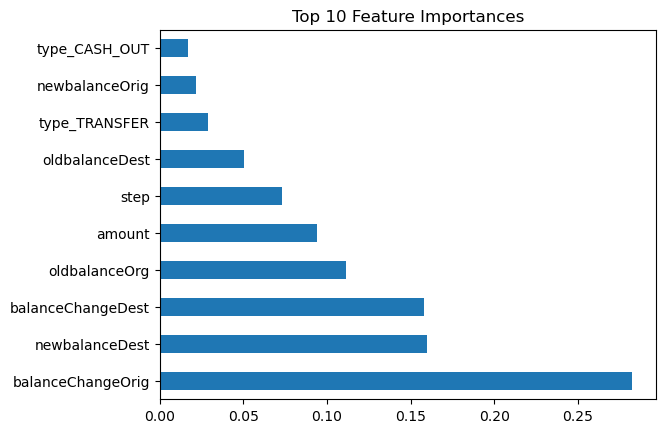

In [23]:
# Plot feature importance
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")

In [ ]:
"""Modeling"""

In [25]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [27]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Train model
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
"""Evaluation"""

In [31]:
# Demonstrate model performance
y_pred = clf.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.97      0.80      0.88      2464

    accuracy                           1.00   1908786
   macro avg       0.99      0.90      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786

ROC AUC Score: 0.9956552553315866


Text(0.5, 1.0, 'Confusion Matrix')

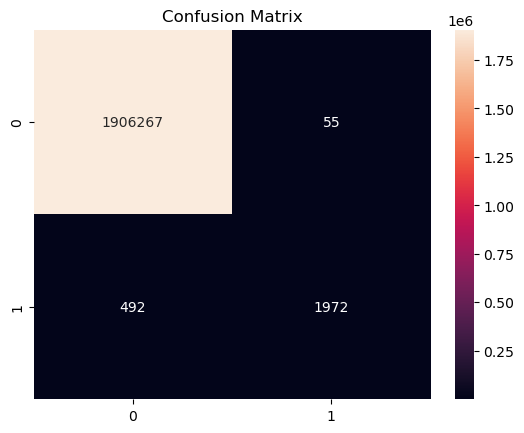

In [33]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")

### Fraud Prevention Recommendations

Based on the model insights and common fraud prevention practices, the company should consider the following infrastructure updates:

1. **Real-time Fraud Detection System**:
   - Deploy the model in production to flag suspicious transactions as they occur.
   - Integrate with customer notifications or a human fraud review team for flagged transactions.

2. **Transaction Limits**:
   - Set dynamic transaction thresholds based on account history, risk scoring, and time of day.
   - Higher-risk accounts should have lower limits for sensitive transaction types like `TRANSFER` and `CASH_OUT`.

3. **Behavioral Monitoring**:
   - Track customer transaction patterns using time-based and frequency-based analytics.
   - Detect anomalies such as a sudden spike in activity or changes in location/IP.

4. **Multi-Factor Authentication (MFA)**:
   - Require MFA for all high-risk transactions (e.g., transferring large amounts or to new recipients).

5. **Blacklisting/Whitelisting Mechanisms**:
   - Automatically flag or block accounts and destinations involved in confirmed fraudulent activity.

6. **Continuous Model Training Pipeline**:
   - Automatically update the fraud detection model on a monthly or quarterly basis with new data.

By proactively adopting these strategies, the company can minimize financial risk, build customer trust, and improve its fraud response time.

### Post-Implementation Monitoring and Success Metrics

To evaluate the effectiveness of the implemented anti-fraud measures, the following approach should be adopted:

#### 📊 Key Metrics to Monitor:
- **Fraud Detection Rate**: Increase in the percentage of fraud caught before transaction completion.
- **False Positive Rate**: Ensure legitimate users aren't frequently flagged.
- **Financial Loss Saved**: Compare fraud-related losses before and after implementation.
- **Precision / Recall / F1-Score**: Use these ML metrics to track model accuracy and consistency.

#### 🧪 Strategies to Validate Improvements:
- **A/B Testing**:
   - Split traffic between new and old systems and measure relative performance.
   - Evaluate user satisfaction, detection rate, and false alarm rate.

- **Drift Detection**:
   - Continuously monitor input features and prediction confidence.
   - Alert data scientists if fraud patterns or user behavior change significantly.

- **User Feedback & Complaint Analysis**:
   - Analyze post-flagging user behavior and complaints for false positive rates.
   - Use qualitative feedback from fraud investigation teams.

- **Retraining and Feedback Loops**:
   - Schedule model retraining every 30-90 days using newly labeled fraud data.
   - Evaluate before/after performance metrics on a rolling basis.

By implementing a combination of statistical performance tracking and business-level fraud impact analysis, the company can confidently assess and improve its fraud prevention strategy.

In [ ]:
"""Interpret Key Fraud Indicators"""

In [35]:
# Already shown in feature importance chart
print("Top 5 important features:")
print(feat_imp.sort_values(ascending=False).head(5))

Top 5 important features:
balanceChangeOrig    0.282434
newbalanceDest       0.159917
balanceChangeDest    0.157982
oldbalanceOrg        0.111474
amount               0.094109
dtype: float64


#### Why are these features important?

Based on the model's feature importance scores, here are some key predictors:

- **amount**: Fraudulent transactions are often significantly higher in value compared to normal ones. Unusually large or small amounts might indicate suspicious behavior.
  
- **balanceChangeOrig (newbalanceOrig - oldbalanceOrg)**: A drastic drop in the original account's balance can indicate that an account was fully drained, which is a common fraud signature.

- **oldbalanceOrg**: Fraudsters might exploit accounts with low or empty balances to conduct transactions, or they may target high-balance accounts for large thefts.

- **type_TRANSFER / type_CASH_OUT**: These types are more vulnerable to fraudulent behavior since they involve movement of cash that is hard to trace once com 

#### 🤔 Do these features make logical sense?

Yes — they align with both common sense and known fraud behavior:

- Sudden large transactions from an account with a low or zero balance are suspicious.
- Transactions that immediately empty an account (balance goes to zero) can suggest fraud or account takeover.
- Cash out and transfer transactions are popular among fraudsters due to their irreversible nature.

These features reflect behavioral anomalies and help differentiate fraudulent activity from normal customer transactions.

In [ ]:
""" Post-Implementation Monitoring
    Simulate Monitoring Performance Over Time (Optional Analysis)"""

In [37]:
# This block simulates how you might compare old vs. new models
# For now, assume `clf` is the "new improved" model.

from sklearn.linear_model import LogisticRegression

In [39]:
# Train a simple baseline model (Logistic Regression)
baseline_model = LogisticRegression(max_iter=1000, class_weight='balanced')
baseline_model.fit(X_train_scaled, y_train)
baseline_preds = baseline_model.predict(X_test_scaled)

In [41]:
# Get classification report for both models
from sklearn.metrics import classification_report

print("🔹 Baseline Model Performance:\n")
print(classification_report(y_test, baseline_preds))

print("🔹 Improved Model (Random Forest) Performance:\n")
print(classification_report(y_test, y_pred))

🔹 Baseline Model Performance:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.95      0.05      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.95      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786

🔹 Improved Model (Random Forest) Performance:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.97      0.80      0.88      2464

    accuracy                           1.00   1908786
   macro avg       0.99      0.90      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786



#### How do we determine if our anti-fraud measures are working?

After deploying the model and implementing fraud-prevention strategies, we need a system for monitoring impact. Here's how:

---

#### Metrics to Track:
- **Fraud Detection Rate**: Are we catching a higher percentage of frauds than before?
- **False Positive Rate**: Is the system wrongly flagging good customers less often?
- **Precision / Recall / F1-score**: These give a balanced view of model performance over time.
- **Customer Complaints**: Fewer complaints about blocked accounts or missed frauds is a good signal.
- **Financial Losses Saved**: A key business metric — is the company saving more money post-implementation?

---

#### Testing & Feedback Loop:
- **A/B Testing**: Deploy model to part of the system and compare against old system.
- **Drift Detection**: Monitor for concept drift (changes in fraud tactics) that affect model accuracy.
- **Retraining Schedule**: Set up regular model retraining intervals (e.g., every quarter).

---

By continuously monitoring these metrics and retraining with new data, the company can maintain a high-performing fraud detection system that adapts to evolving threats.